In [1]:
import os
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

/Users/lihuiyang/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
train_data_path = os.path.join(os.getcwd(), 'Data','PartC','e-cornellFinal.csv')
train = pd.read_csv(train_data_path, encoding='Latin-1')
test_data_path = os.path.join(os.getcwd(), 'Data','PartC','3cornell.csv')
test = pd.read_csv(test_data_path, encoding='Latin-1')

In [3]:
X_train=train.drop(['label'], axis=1) #features
y_train=train['label'] #targets
X_test=test.drop(['label'], axis=1) #features
y_test=test['label'] #targets

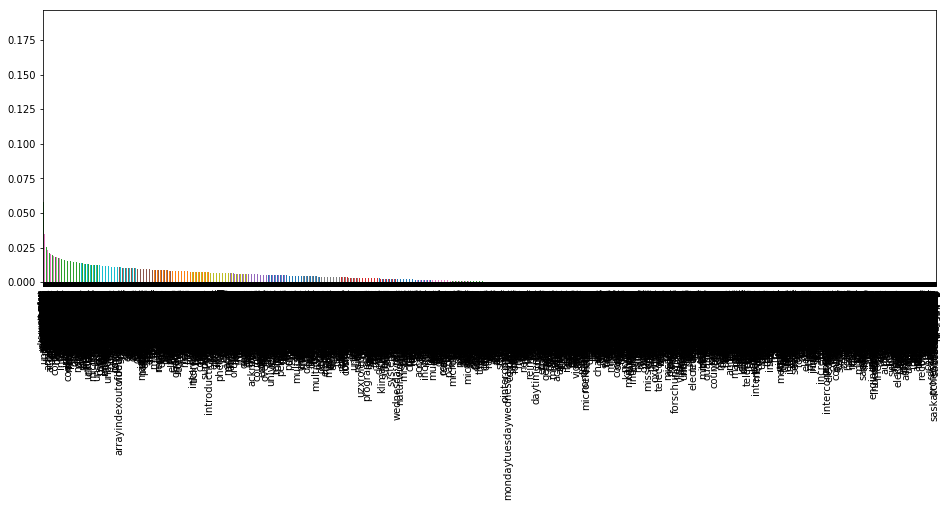

In [4]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_train, y_train,copy =False)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

mi= pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False, inplace=True)

mi.plot.bar(figsize=(16,5))

In [5]:
from sklearn.feature_selection import SelectPercentile, chi2
selector = SelectPercentile(mutual_info_classif, percentile=10).fit(X_train, y_train)
print(len(X_train.columns[selector.get_support()]))

X_train_mi = selector.transform(X_train)
X_test_mi = selector.transform(X_test)
print(X_train_mi.shape)
print(X_test_mi.shape)

3273
(7414, 3273)
(867, 3273)


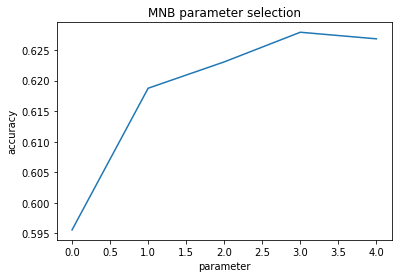

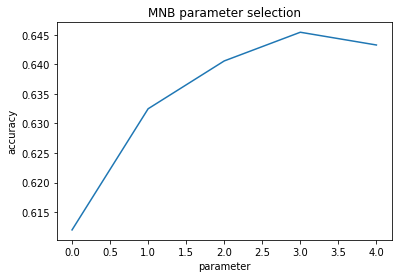

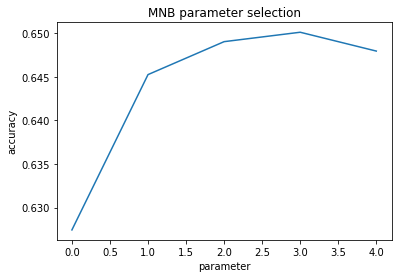

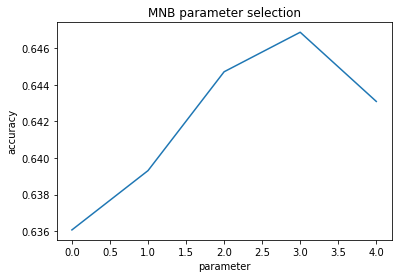

Average precision score mean: 0.6347830941605425
Average precision score Standard Deviation: 0.013959867614175553
Average recall score mean: 0.6347830941605425
Average recall score Standard Deviation: 0.013959867614175553
f1_score mean: 0.547959376233148
f1_score Standard Deviation: 0.014214024725423926
accuracy mean: 0.6347830941605425
accuracy Standard Deviation: 0.013959867614175553


In [19]:
#KFold MultinomialNB accuracy_score f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)
list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]

for train_la, valid_la in (skf.split(X_train_mi,y_train)):
    list_accuracy1=[]
    for i in range(0,5):
        X_train_k, X_validation = X_train_mi[train_la], X_train_mi[valid_la]
        y_train_k, y_validation = y_train[train_la], y_train[valid_la]
        clf = MultinomialNB(alpha=i)
        clf.fit(X_train_k, y_train_k)  
        a=clf.predict(X_validation)

        f1_score=metrics.f1_score(y_validation, a, average='macro')
        accuracy=accuracy_score(y_validation, a)
        p = precision_score(y_validation, a, average='micro')
        R = recall_score(y_validation, a, average='micro')
        
        list_f1.append(f1_score)
        list_accuracy.append(accuracy)
        list_Precision.append(p)
        list_Recall.append(R)
        list_accuracy1.append(accuracy)
#     plt.plot(range(0,5),list_accuracy1)
#     plt.xlabel("parameter")
#     plt.ylabel("accuracy")
#     plt.title('MNB parameter selection')
#     plt.savefig('MultinomialNB_accuracy.png',dpi=100)
#     plt.show()
print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall))
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))

# plt.plot(range(0,3),list_accuracy)
# plt.xlabel("number of neighbors")
# plt.ylabel("accuracy")
# plt.title('MNB parameter selection')
# plt.savefig('MultinomialNB_accuracy.png',dpi=100)
# plt.show()

In [20]:
#KFold MultinomialNB accuracy_score f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)
list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]

for train_la, valid_la in (skf.split(X_train_mi,y_train)):

    
        X_train_k, X_validation = X_train_mi[train_la], X_train_mi[valid_la]
        y_train_k, y_validation = y_train[train_la], y_train[valid_la]
        clf = MultinomialNB(alpha=3)
        clf.fit(X_train_k, y_train_k)  
        a=clf.predict(X_validation)

        f1_score=metrics.f1_score(y_validation, a, average='macro')
        accuracy=accuracy_score(y_validation, a)
        p = precision_score(y_validation, a, average='micro')
        R = recall_score(y_validation, a, average='micro')
        
        list_f1.append(f1_score)
        list_accuracy.append(accuracy)
        list_Precision.append(p)
        list_Recall.append(R)

print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall))
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))

# plt.plot(range(0,3),list_accuracy)
# plt.xlabel("number of neighbors")
# plt.ylabel("accuracy")
# plt.title('MNB parameter selection')
# plt.savefig('MultinomialNB_accuracy.png',dpi=100)
# plt.show()

Average precision score mean: 0.6425776306568028
Average precision score Standard Deviation: 0.008644414594977078
Average recall score mean: 0.6425776306568028
Average recall score Standard Deviation: 0.008644414594977078
f1_score mean: 0.5556563816031567
f1_score Standard Deviation: 0.0072628416353218905
accuracy mean: 0.6425776306568028
accuracy Standard Deviation: 0.008644414594977078


In [21]:
#KFold LogisticRegression accuracy_score f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)

list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]

for train_la, valid_la in (skf.split(X_train_mi,y_train)):
    X_train_k, X_validation = X_train_mi[train_la], X_train_mi[valid_la]
    y_train_k, y_validation = y_train[train_la], y_train[valid_la]
    lr=LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
    lr.fit(X_train_k, y_train_k)  
    a=lr.predict(X_validation)
    
    f1_score=metrics.f1_score(y_validation, a, average='macro')
    accuracy=accuracy_score(y_validation, a)
    p = precision_score(y_validation, a, average='micro')
    R = recall_score(y_validation, a, average='micro')
        
    list_f1.append(f1_score)
    list_accuracy.append(accuracy)
    list_Precision.append(p)
    list_Recall.append(R)
    
    
    
print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall))  
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))


# chnage multi_class parameter to the one-vs-rest (OvR) scheme that is suitable for the multiclass case

list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]
skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)

for train_la, valid_la in (skf.split(X_train_mi,y_train)):
    X_train_k, X_validation = X_train_mi[train_la], X_train_mi[valid_la]
    y_train_k, y_validation = y_train[train_la], y_train[valid_la]
    lr=LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_k, y_train_k)  
    a=lr.predict(X_validation)
    
    f1_score=metrics.f1_score(y_validation, a, average='macro')
    accuracy=accuracy_score(y_validation, a)
    p = precision_score(y_validation, a, average='micro')
    R = recall_score(y_validation, a, average='micro')
        
    list_f1.append(f1_score)
    list_accuracy.append(accuracy)
    list_Precision.append(p)
    list_Recall.append(R)
    
print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall))  
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))

Average precision score mean: 0.770709093106685
Average precision score Standard Deviation: 0.007894819314641971
Average recall score mean: 0.770709093106685
Average recall score Standard Deviation: 0.007894819314641971
f1_score mean: 0.6726472177794807
f1_score Standard Deviation: 0.011070891089395213
accuracy mean: 0.770709093106685
accuracy Standard Deviation: 0.007894819314641971
Average precision score mean: 0.7778493473651775
Average precision score Standard Deviation: 0.005331517354174394
Average recall score mean: 0.7778493473651775
Average recall score Standard Deviation: 0.005331517354174394
f1_score mean: 0.6898096960602513
f1_score Standard Deviation: 0.01449856350440381
accuracy mean: 0.7778493473651775
accuracy Standard Deviation: 0.005331517354174394


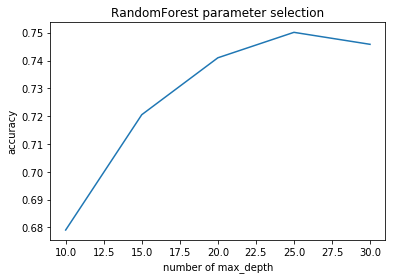

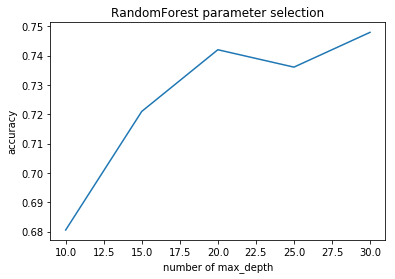

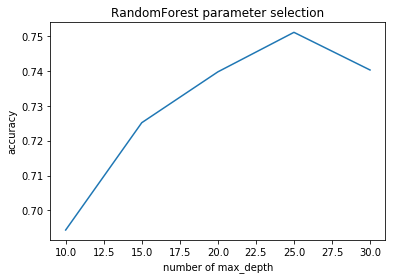

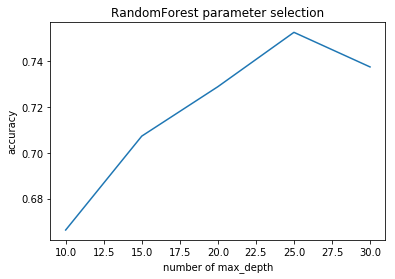

Average precision score mean: 0.7253830944013796
Average precision score Standard Deviation: 0.025643248596622203
Average recall score mean: 0.7253830944013796
Average recall score Standard Deviation: 0.025643248596622203
f1_score mean: 0.5371525879925587
f1_score Standard Deviation: 0.054932894124833834
accuracy mean: 0.7253830944013796
accuracy Standard Deviation: 0.025643248596622203


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)
list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]

for train_la, valid_la in (skf.split(X_train_mi,y_train)):
    list_accuracy1=[]
    for i in range(10,35,5):
        X_train_k, X_validation = X_train_mi[train_la], X_train_mi[valid_la]
        y_train_k, y_validation = y_train[train_la], y_train[valid_la]
        classifier = RandomForestClassifier(max_depth=i, random_state=0)
        classifier.fit(X_train_k, y_train_k)  
        a=classifier.predict(X_validation)
        
        f1_score=metrics.f1_score(y_validation, a, average='macro')
        accuracy=accuracy_score(y_validation, a)
        p = precision_score(y_validation, a, average='micro')
        R = recall_score(y_validation, a, average='micro')
        
        list_f1.append(f1_score)
        list_accuracy.append(accuracy)
        list_Precision.append(p)
        list_Recall.append(R)
        list_accuracy1.append(accuracy)
        
    plt.plot(range(10,35,5),list_accuracy1)
    plt.xlabel("number of max_depth")
    plt.ylabel("accuracy")
    plt.title('RandomForest parameter selection')
#     plt.savefig('RandomForest_accuracy.png',dpi=100)
    plt.show()
        
print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall))     
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))

# plt.plot(range(1,100),list_accuracy)
# plt.xlabel("number of neighbors")
# plt.ylabel("accuracy")
# plt.title('RandomForest parameter selection')
# plt.savefig('RandomForest_accuracy.png',dpi=100)
# plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)
list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]

for train_la, valid_la in (skf.split(X_train_mi,y_train)):

        X_train_k, X_validation = X_train_mi[train_la], X_train_mi[valid_la]
        y_train_k, y_validation = y_train[train_la], y_train[valid_la]
        classifier = RandomForestClassifier(max_depth=25, random_state=0)
        classifier.fit(X_train_k, y_train_k)  
        a=classifier.predict(X_validation)
        
        f1_score=metrics.f1_score(y_validation, a, average='macro')
        accuracy=accuracy_score(y_validation, a)
        p = precision_score(y_validation, a, average='micro')
        R = recall_score(y_validation, a, average='micro')
        
        list_f1.append(f1_score)
        list_accuracy.append(accuracy)
        list_Precision.append(p)
        list_Recall.append(R)
    
print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall))     
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))


Average precision score mean: 0.7475044847807153
Average precision score Standard Deviation: 0.006645906284784011
Average recall score mean: 0.7475044847807153
Average recall score Standard Deviation: 0.006645906284784011
f1_score mean: 0.5771150709182103
f1_score Standard Deviation: 0.015857874323331866
accuracy mean: 0.7475044847807153
accuracy Standard Deviation: 0.006645906284784011


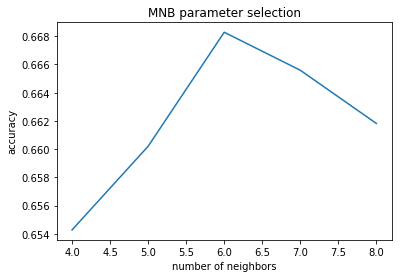

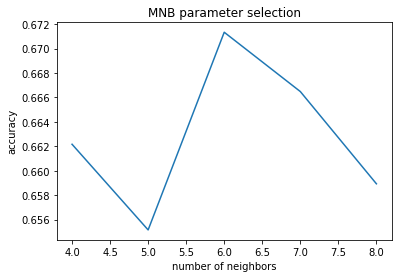

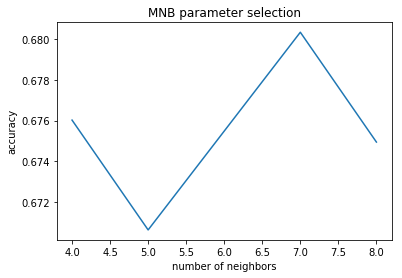

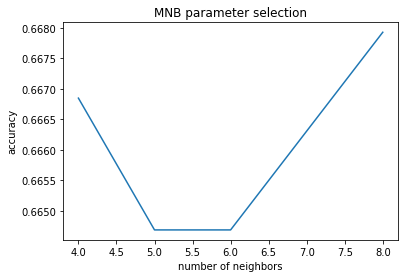

Average precision score mean: 0.6666073171221106
Average precision score Standard Deviation: 0.0067199839607771815
Average recall score mean: 0.6666073171221106
Average recall score Standard Deviation: 0.0067199839607771815
f1_score mean: 0.5378755109021525
f1_score Standard Deviation: 0.011887849326967102
accuracy mean: 0.6666073171221106
accuracy Standard Deviation: 0.0067199839607771815


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)
list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]

for train_la, valid_la in (skf.split(X_train_mi,y_train)):
    list_accuracy1=[]
    for i in range(4,9):
        X_train_k, X_validation = X_train_mi[train_la], X_train_mi[valid_la]
        y_train_k, y_validation = y_train[train_la], y_train[valid_la]
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(X_train_k, y_train_k)  
        a=neigh.predict(X_validation)

        f1_score=metrics.f1_score(y_validation, a, average='macro')
        accuracy=accuracy_score(y_validation, a)
        p = precision_score(y_validation, a, average='micro')
        R = recall_score(y_validation, a, average='micro')
        
        list_f1.append(f1_score)
        list_accuracy.append(accuracy)
        list_Precision.append(p)
        list_Recall.append(R)
        list_accuracy1.append(accuracy)
        
    plt.plot(range(4,9),list_accuracy1)
    plt.xlabel("number of neighbors")
    plt.ylabel("accuracy")
    plt.title('MNB parameter selection')
    plt.show()
        
print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall))     
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))

# plt.plot(range(2,10),list_accuracy)
# plt.xlabel("number of neighbors")
# plt.ylabel("accuracy")
# plt.title('MNB parameter selection')
# plt.savefig('MultinomialNB_accuracy.png',dpi=100)
# plt.show()

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)
list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]

for train_la, valid_la in (skf.split(X_train_mi,y_train)):

        X_train_k, X_validation = X_train_mi[train_la], X_train_mi[valid_la]
        y_train_k, y_validation = y_train[train_la], y_train[valid_la]
        neigh = KNeighborsClassifier(n_neighbors=7)
        neigh.fit(X_train_k, y_train_k)  
        a=neigh.predict(X_validation)

        f1_score=metrics.f1_score(y_validation, a, average='macro')
        accuracy=accuracy_score(y_validation, a)
        p = precision_score(y_validation, a, average='micro')
        R = recall_score(y_validation, a, average='micro')
        
        list_f1.append(f1_score)
        list_accuracy.append(accuracy)
        list_Precision.append(p)
        list_Recall.append(R)
        list_accuracy1.append(accuracy)
        
        
print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall))     
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))


Average precision score mean: 0.6696821766898065
Average precision score Standard Deviation: 0.006165653633177674
Average recall score mean: 0.6696821766898065
Average recall score Standard Deviation: 0.006165653633177674
f1_score mean: 0.5396109087530597
f1_score Standard Deviation: 0.008198656107357224
accuracy mean: 0.6696821766898065
accuracy Standard Deviation: 0.006165653633177674


In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score
skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)
list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]


for train_la, valid_la in (skf.split(X_train_mi,y_train)):
    list_accuracy1=[]
    for i in range(0,5,1):
        X_train_k, X_validation = X_train_mi[train_la], X_train_mi[valid_la]
        y_train_k, y_validation = y_train[train_la], y_train[valid_la]
        gnb = GaussianNB(var_smoothing=i)
        gnb.fit(X_train_k, y_train_k)  
        a=gnb.predict(X_validation)

        f1_score=metrics.f1_score(y_validation, a, average='macro')
        accuracy=accuracy_score(y_validation, a)
        p = precision_score(y_validation, a, average='micro')
        R = recall_score(y_validation, a, average='micro')
        
        list_f1.append(f1_score)
        list_accuracy.append(accuracy)
        list_Precision.append(p)
        list_Recall.append(R)
        list_accuracy1.append(accuracy)
        
    plt.plot(range(0,5,1),list_accuracy)
    plt.xlabel("number of parameter")
    plt.ylabel("accuracy")
    plt.title('GaussianNB parameter selection')
    plt.show()
        
print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall))     
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))
# plt.plot(range(0,1),list_accuracy)
# plt.xlabel("number of neighbors")
# plt.ylabel("accuracy")
# plt.title('GaussianNB parameter selection')
# plt.savefig('GaussianNB_accuracy.png',dpi=100)
# plt.show()

TypeError: __init__() got an unexpected keyword argument 'var_smoothing'

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score
skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)
list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]


for train_la, valid_la in (skf.split(X_train_mi,y_train)):

        X_train_k, X_validation = X_train_mi[train_la], X_train_mi[valid_la]
        y_train_k, y_validation = y_train[train_la], y_train[valid_la]
        gnb = GaussianNB()
        gnb.fit(X_train_k, y_train_k)  
        a=gnb.predict(X_validation)

        f1_score=metrics.f1_score(y_validation, a, average='macro')
        accuracy=accuracy_score(y_validation, a)
        p = precision_score(y_validation, a, average='micro')
        R = recall_score(y_validation, a, average='micro')
        
        list_f1.append(f1_score)
        list_accuracy.append(accuracy)
        list_Precision.append(p)
        list_Recall.append(R)
        
print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall))     
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))


Average precision score mean: 0.3577177876207259
Average precision score Standard Deviation: 0.014581591719388953
Average recall score mean: 0.3577177876207259
Average recall score Standard Deviation: 0.014581591719388953
f1_score mean: 0.29747178551720266
f1_score Standard Deviation: 0.012234708977317262
accuracy mean: 0.3577177876207259
accuracy Standard Deviation: 0.014581591719388953
